https://keras.io/getting_started/

# What can be tunned in Neural Network:
1. **Batch and epoch**
2. **Optimization Algorithams**
3. **Learning rate and momentum**
4. **Weight Intilization** 
5. activation Functions
6. **No of hidden layers & no of nuerons**

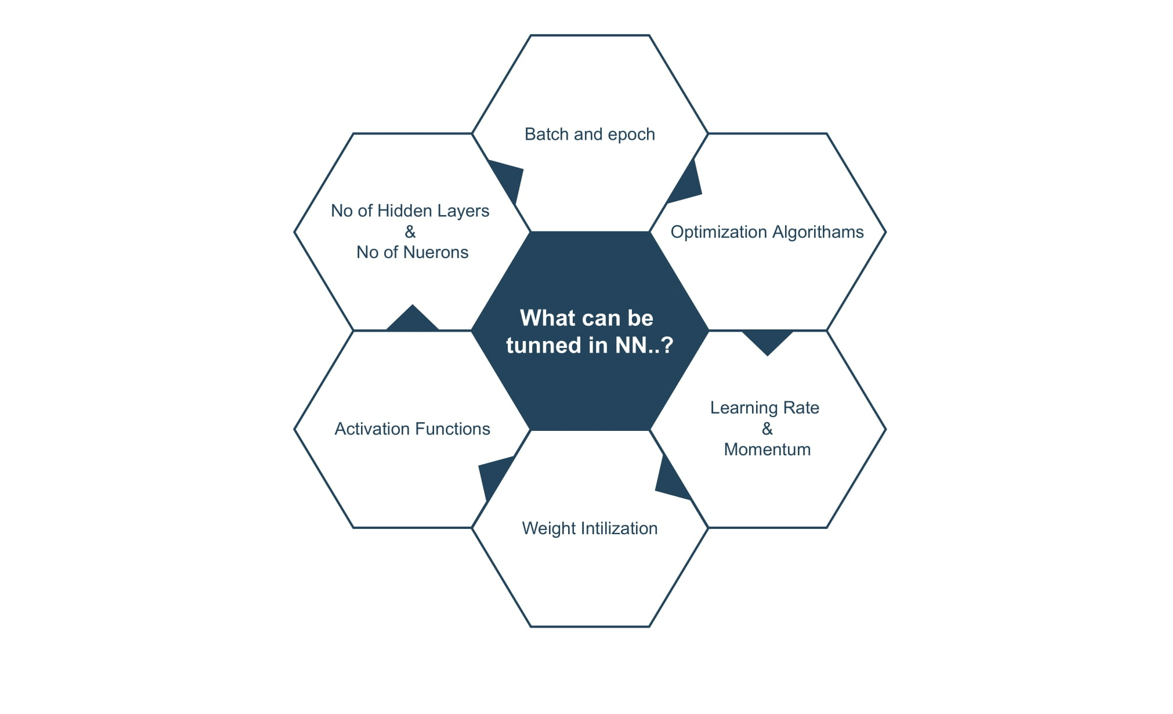

In [1]:
#importing necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
import warnings 
warnings.filterwarnings('ignore')

# <font color='red'>1. Tuning batch and epochs

In [2]:
#load data
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#spliting data
X = data.iloc[:,0:8]
y = data.iloc[:,8]

In [4]:
#Function to create model for KerasClassifier
def create_my_model():
    mymodel = Sequential()
    mymodel.add(Dense(12,input_dim=8,activation="relu"))
    mymodel.add(Dense(1,activation="sigmoid"))
    
    #compile the model 
    mymodel.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    return mymodel

In [5]:
#create model 
model = KerasClassifier(build_fn=create_my_model)

In [6]:
#define the grid search parameters 
batchsize = [10,20,40,60,80,100]
epochs = [10,30,50]

In [7]:
parameter_grid = dict(batch_size=batchsize,epochs=epochs)

In [8]:
parameter_grid

{'batch_size': [10, 20, 40, 60, 80, 100], 'epochs': [10, 30, 50]}

In [9]:
mygrid = GridSearchCV(estimator=model,param_grid=parameter_grid,n_jobs=-1,cv=3)

In [10]:
grid_result = mygrid.fit(X,y)

Epoch 1/50
77/77 [==============================] - 1s 1ms/step - loss: 7.2557 - accuracy: 0.6055
Epoch 2/50
77/77 [==============================] - 0s 932us/step - loss: 2.8855 - accuracy: 0.5638
Epoch 3/50
77/77 [==============================] - 0s 899us/step - loss: 2.0871 - accuracy: 0.5612
Epoch 4/50
77/77 [==============================] - 0s 836us/step - loss: 1.7848 - accuracy: 0.5859
Epoch 5/50
77/77 [==============================] - 0s 875us/step - loss: 1.5338 - accuracy: 0.5651
Epoch 6/50
77/77 [==============================] - 0s 792us/step - loss: 1.3481 - accuracy: 0.5951
Epoch 7/50
77/77 [==============================] - 0s 861us/step - loss: 1.2187 - accuracy: 0.5859
Epoch 8/50
77/77 [==============================] - 0s 844us/step - loss: 1.1026 - accuracy: 0.5820
Epoch 9/50
77/77 [==============================] - 0s 899us/step - loss: 1.0213 - accuracy: 0.5951
Epoch 10/50
77/77 [==============================] - 0s 972us/step - loss: 0.9375 - accuracy: 0.6003
E

In [11]:
#summarize result 
grid_result.best_params_

{'batch_size': 10, 'epochs': 50}

# <font color='red'>2. Tuning Optimization Algorithams

In [12]:
#Function to create model for KerasClassifier
def create_my_model(optimizer='adam'):
    mymodel = Sequential()
    mymodel.add(Dense(12,input_dim=8,activation="relu"))
    mymodel.add(Dense(1,activation="sigmoid"))
    
    #compile the model 
    mymodel.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
    return mymodel

In [13]:
#create model 
model = KerasClassifier(build_fn=create_my_model,epochs=30,batch_size=20)

In [14]:
#define the grid search parameters 
optimizer = ['SGD',"Adadelta","RMSprop","Adagrad","Adam"]
parameter_grid = dict(optimizer=optimizer)
parameter_grid

{'optimizer': ['SGD', 'Adadelta', 'RMSprop', 'Adagrad', 'Adam']}

In [15]:
grid = GridSearchCV(estimator=model,param_grid=parameter_grid,n_jobs=-1,cv=3)
grid_result = grid.fit(X,y)

Epoch 1/30
39/39 [==============================] - 1s 3ms/step - loss: 6.1273 - accuracy: 0.6159
Epoch 2/30
39/39 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.6628
Epoch 3/30
39/39 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.6615
Epoch 4/30
39/39 [==============================] - 0s 2ms/step - loss: 0.6706 - accuracy: 0.6719
Epoch 5/30
39/39 [==============================] - 0s 3ms/step - loss: 0.6642 - accuracy: 0.6667
Epoch 6/30
39/39 [==============================] - 0s 2ms/step - loss: 0.6609 - accuracy: 0.6654
Epoch 7/30
39/39 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6654
Epoch 8/30
39/39 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.6680
Epoch 9/30
39/39 [==============================] - 0s 3ms/step - loss: 0.6500 - accuracy: 0.6615
Epoch 10/30
39/39 [==============================] - 0s 3ms/step - loss: 0.6478 - accuracy: 0.6693
Epoch 11/30
39/39 [

In [16]:
grid_result.best_params_

{'optimizer': 'SGD'}

# <font color='red'>3. Tunning Learning rate and momentum

In [17]:
#Function to create model for KerasClassifier
from keras.optimizers import SGD
def create_my_model(learning_rate=0.01,momentum=0.1):
    mymodel = Sequential()
    mymodel.add(Dense(12,input_dim=8,activation="relu"))
    mymodel.add(Dense(1,activation="sigmoid"))
    
    #Optimizer
    optimizer = SGD(learning_rate,momentum)
    #compile the model 
    mymodel.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['acc'])
    return mymodel

In [18]:
#create model 
model = KerasClassifier(build_fn=create_my_model,epochs=30,batch_size=20)

In [19]:
#define the grid search parameters 
learning_rate = [0.0001,0.001,0.01,0.1]
momentum = [0.1,0.3,0.5,0.7,0.9]
parameter_grid = dict(learning_rate=learning_rate,momentum=momentum)
parameter_grid

{'learning_rate': [0.0001, 0.001, 0.01, 0.1],
 'momentum': [0.1, 0.3, 0.5, 0.7, 0.9]}

In [20]:
grid = GridSearchCV(estimator=model,param_grid=parameter_grid,n_jobs=-1,cv=3)
grid_result = grid.fit(X,y)

Epoch 1/30
39/39 [==============================] - 0s 1ms/step - loss: 2.7293 - acc: 0.5560
Epoch 2/30
39/39 [==============================] - 0s 1ms/step - loss: 1.5092 - acc: 0.5872
Epoch 3/30
39/39 [==============================] - 0s 1ms/step - loss: 1.2078 - acc: 0.5872
Epoch 4/30
39/39 [==============================] - 0s 2ms/step - loss: 1.0530 - acc: 0.6068
Epoch 5/30
39/39 [==============================] - 0s 2ms/step - loss: 0.9727 - acc: 0.6146
Epoch 6/30
39/39 [==============================] - 0s 2ms/step - loss: 0.8956 - acc: 0.6068
Epoch 7/30
39/39 [==============================] - 0s 1ms/step - loss: 0.9065 - acc: 0.6133
Epoch 8/30
39/39 [==============================] - 0s 2ms/step - loss: 0.8291 - acc: 0.6250
Epoch 9/30
39/39 [==============================] - 0s 1ms/step - loss: 0.7797 - acc: 0.6263
Epoch 10/30
39/39 [==============================] - 0s 2ms/step - loss: 0.7578 - acc: 0.6549
Epoch 11/30
39/39 [==============================] - 0s 2ms/step - lo

In [21]:
grid_result.best_params_

{'learning_rate': 0.001, 'momentum': 0.3}

# <font color='red'>4. Tunning Weight Intilization

In [23]:
# Function to create model, required for KerasClassifier
def create_model(init_weights='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), kernel_initializer=init_weights, activation='relu'))
    model.add(Dense(1, kernel_initializer=init_weights, activation='sigmoid'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [34]:
#create model 
model = KerasClassifier(build_fn=create_model,epochs=50,batch_size=20)

In [35]:
# define the grid search parameters
init_weights = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_weights=init_weights)
param_grid

{'init_weights': ['uniform',
  'lecun_uniform',
  'normal',
  'zero',
  'glorot_normal',
  'glorot_uniform',
  'he_normal',
  'he_uniform']}

In [36]:
grid = GridSearchCV(estimator=model,param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X,y)

Epoch 1/50
39/39 [==============================] - 0s 945us/step - loss: 0.7532 - accuracy: 0.5521
Epoch 2/50
39/39 [==============================] - 0s 870us/step - loss: 0.6526 - accuracy: 0.6549
Epoch 3/50
39/39 [==============================] - 0s 998us/step - loss: 0.6385 - accuracy: 0.6602
Epoch 4/50
39/39 [==============================] - 0s 972us/step - loss: 0.6259 - accuracy: 0.6576
Epoch 5/50
39/39 [==============================] - 0s 1ms/step - loss: 0.6210 - accuracy: 0.6667
Epoch 6/50
39/39 [==============================] - 0s 986us/step - loss: 0.6197 - accuracy: 0.6589
Epoch 7/50
39/39 [==============================] - 0s 1ms/step - loss: 0.6157 - accuracy: 0.6654
Epoch 8/50
39/39 [==============================] - 0s 967us/step - loss: 0.6090 - accuracy: 0.6823
Epoch 9/50
39/39 [==============================] - 0s 857us/step - loss: 0.6019 - accuracy: 0.6875
Epoch 10/50
39/39 [==============================] - 0s 1ms/step - loss: 0.6023 - accuracy: 0.6732
Epoch

In [37]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.718750 using {'init_weights': 'normal'}
0.692708 (0.006639) with: {'init_weights': 'uniform'}
0.671875 (0.009568) with: {'init_weights': 'lecun_uniform'}
0.718750 (0.013902) with: {'init_weights': 'normal'}
0.651042 (0.024774) with: {'init_weights': 'zero'}
0.647135 (0.084766) with: {'init_weights': 'glorot_normal'}
0.656250 (0.024910) with: {'init_weights': 'glorot_uniform'}
0.648438 (0.008438) with: {'init_weights': 'he_normal'}
0.684896 (0.012890) with: {'init_weights': 'he_uniform'}


In [38]:
grid_result.best_params_

{'init_weights': 'normal'}

# <font color='red'>5. Tunning activation Functions

In [29]:
def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(12, input_shape=(8,), kernel_initializer='uniform', activation=activation))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [39]:
#create model 
model = KerasClassifier(build_fn=create_model,epochs=30,batch_size=20)

In [40]:
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
param_grid

{'activation': ['softmax',
  'softplus',
  'softsign',
  'relu',
  'tanh',
  'sigmoid',
  'hard_sigmoid',
  'linear']}

In [41]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X,y)

Epoch 1/30
39/39 [==============================] - 0s 812us/step - loss: 0.6631 - accuracy: 0.6497
Epoch 2/30
39/39 [==============================] - 0s 1ms/step - loss: 0.6485 - accuracy: 0.6536
Epoch 3/30
39/39 [==============================] - 0s 1ms/step - loss: 0.6341 - accuracy: 0.6497
Epoch 4/30
39/39 [==============================] - 0s 899us/step - loss: 0.6222 - accuracy: 0.6471
Epoch 5/30
39/39 [==============================] - 0s 858us/step - loss: 0.6159 - accuracy: 0.6836
Epoch 6/30
39/39 [==============================] - 0s 1ms/step - loss: 0.6140 - accuracy: 0.6771
Epoch 7/30
39/39 [==============================] - 0s 919us/step - loss: 0.6078 - accuracy: 0.6667
Epoch 8/30
39/39 [==============================] - 0s 915us/step - loss: 0.6011 - accuracy: 0.6953
Epoch 9/30
39/39 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.6901
Epoch 10/30
39/39 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.6888
Epoch 11/

In [42]:
grid_result.best_params_

{'activation': 'softplus'}

In [48]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.697917 using {'activation': 'softplus'}
0.651042 (0.024774) with: {'activation': 'softmax'}
0.697917 (0.009207) with: {'activation': 'softplus'}
0.669271 (0.025976) with: {'activation': 'softsign'}
0.683594 (0.014616) with: {'activation': 'relu'}
0.680990 (0.004872) with: {'activation': 'tanh'}
0.670573 (0.023939) with: {'activation': 'sigmoid'}
0.651042 (0.024150) with: {'activation': 'hard_sigmoid'}
0.695312 (0.013902) with: {'activation': 'linear'}


# <font color='red'>6. Tunning No of hidden layers & no of nuerons

In [17]:
#Function to create model for KerasClassifier
def create_my_model(layers):
    mymodel = Sequential()
    for i,nodes in enumerate(layers):
        if i==0:
            mymodel.add(Dense(nodes,input_dim=X.shape[1],activation="relu"))
        else:
            mymodel.add(Dense(nodes,activation='relu'))
    mymodel.add(Dense(1,activation="sigmoid"))
    
    mymodel.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])
    return mymodel

In [18]:
#create model 
model = KerasClassifier(build_fn=create_my_model,epochs=30,batch_size=20)

In [28]:
#define the grid search parameters 
layers = [[20], [40, 20], [45, 30, 15]]
parameter_grid = dict(layers=layers)
parameter_grid

{'layers': [[20], [40, 20], [45, 30, 15]]}

In [29]:
grid = GridSearchCV(estimator=model,param_grid=parameter_grid,n_jobs=-1,cv=3)

In [30]:
grid_result = grid.fit(X,y)

Epoch 1/30
39/39 [==============================] - 0s 1ms/step - loss: 5.0342 - accuracy: 0.5768
Epoch 2/30
39/39 [==============================] - 0s 1ms/step - loss: 1.6153 - accuracy: 0.6354
Epoch 3/30
39/39 [==============================] - 0s 1ms/step - loss: 0.8943 - accuracy: 0.6680
Epoch 4/30
39/39 [==============================] - 0s 1ms/step - loss: 0.8039 - accuracy: 0.6510
Epoch 5/30
39/39 [==============================] - 0s 1ms/step - loss: 0.8392 - accuracy: 0.6510
Epoch 6/30
39/39 [==============================] - 0s 981us/step - loss: 0.7399 - accuracy: 0.6849
Epoch 7/30
39/39 [==============================] - 0s 1ms/step - loss: 0.6820 - accuracy: 0.6888
Epoch 8/30
39/39 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.7083
Epoch 9/30
39/39 [==============================] - 0s 1ms/step - loss: 0.6277 - accuracy: 0.7057
Epoch 10/30
39/39 [==============================] - 0s 1ms/step - loss: 0.6371 - accuracy: 0.6784
Epoch 11/30
39/39

In [31]:
grid_result.best_params_

{'layers': [40, 20]}

# How to Select how many hidden layer and neurons in a neural network KN

### Data Preprocessing :

In [23]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
df = pd.read_csv('Churn_data.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
# as we dont need the features like RowNumber	CustomerId	Surnam.
# iam dropping those features 
df = df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [26]:
#Dividing data into x and y
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

### One-hot encoding

In [27]:
#Create dummy variables 
Geography = pd.get_dummies(x["Geography"],drop_first=True)
Gender = pd.get_dummies(x["Gender"],drop_first=True)

In [28]:
#Concatenate the Data Frames
x = pd.concat([x,Geography,Gender],axis=1)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [29]:
#Dropping unnessary columns 
x = x.drop(["Geography","Gender"],axis=1)

In [30]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler

In [35]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [36]:
model = KerasClassifier(build_fn=create_model, verbose=1)

In [37]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
#grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

In [38]:
grid_result = grid.fit(X_train, y_train)

Epoch 1/30
50/50 [==============================] - 0s 1ms/step - loss: 1.4579 - accuracy: 0.4202
Epoch 2/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.6650
Epoch 3/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6049 - accuracy: 0.7644
Epoch 4/30
50/50 [==============================] - 0s 885us/step - loss: 0.5462 - accuracy: 0.7956
Epoch 5/30
50/50 [==============================] - 0s 914us/step - loss: 0.4972 - accuracy: 0.8009
Epoch 6/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4683 - accuracy: 0.8031
Epoch 7/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.8009
Epoch 8/30
50/50 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8008
Epoch 9/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4435 - accuracy: 0.8020
Epoch 10/30
50/50 [==============================] - 0s 987us/step - loss: 0.4388 - accuracy: 0.8027
Epoch 11/30
5

50/50 [==============================] - 0s 1ms/step - loss: 0.4433 - accuracy: 0.7998
Epoch 11/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4448 - accuracy: 0.8019
Epoch 12/30
50/50 [==============================] - 0s 932us/step - loss: 0.4399 - accuracy: 0.7992
Epoch 13/30
50/50 [==============================] - 0s 990us/step - loss: 0.4388 - accuracy: 0.8011
Epoch 14/30
50/50 [==============================] - 0s 995us/step - loss: 0.4408 - accuracy: 0.8014
Epoch 15/30
50/50 [==============================] - 0s 891us/step - loss: 0.4397 - accuracy: 0.8016
Epoch 16/30
50/50 [==============================] - 0s 773us/step - loss: 0.4429 - accuracy: 0.8008
Epoch 17/30
50/50 [==============================] - 0s 783us/step - loss: 0.4408 - accuracy: 0.8016
Epoch 18/30
50/50 [==============================] - 0s 850us/step - loss: 0.4396 - accuracy: 0.8005
Epoch 19/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8003
Epoch 20

13/13 [==============================] - 0s 1ms/step - loss: 0.4361 - accuracy: 0.8156
Epoch 1/30
50/50 [==============================] - 0s 968us/step - loss: 0.5550 - accuracy: 0.7159
Epoch 2/30
50/50 [==============================] - 0s 960us/step - loss: 0.4516 - accuracy: 0.7973
Epoch 3/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.7983
Epoch 4/30
50/50 [==============================] - 0s 896us/step - loss: 0.4445 - accuracy: 0.8005
Epoch 5/30
50/50 [==============================] - 0s 930us/step - loss: 0.4657 - accuracy: 0.8034
Epoch 6/30
50/50 [==============================] - 0s 849us/step - loss: 0.4485 - accuracy: 0.7995
Epoch 7/30
50/50 [==============================] - 0s 784us/step - loss: 0.4424 - accuracy: 0.7986
Epoch 8/30
50/50 [==============================] - 0s 846us/step - loss: 0.4430 - accuracy: 0.7983
Epoch 9/30
50/50 [==============================] - 0s 932us/step - loss: 0.4533 - accuracy: 0.8033
Epoch 10/30
50/

Epoch 19/30
50/50 [==============================] - 0s 929us/step - loss: 12.1684 - accuracy: 0.2020
Epoch 20/30
50/50 [==============================] - 0s 885us/step - loss: 12.1684 - accuracy: 0.2020
Epoch 21/30
50/50 [==============================] - 0s 897us/step - loss: 12.1684 - accuracy: 0.2020
Epoch 22/30
50/50 [==============================] - 0s 840us/step - loss: 12.1684 - accuracy: 0.2020
Epoch 23/30
50/50 [==============================] - 0s 1ms/step - loss: 12.1684 - accuracy: 0.2020
Epoch 24/30
50/50 [==============================] - 0s 883us/step - loss: 12.1684 - accuracy: 0.2020
Epoch 25/30
50/50 [==============================] - 0s 850us/step - loss: 12.1684 - accuracy: 0.2020
Epoch 26/30
50/50 [==============================] - 0s 887us/step - loss: 12.1684 - accuracy: 0.2020
Epoch 27/30
50/50 [==============================] - 0s 928us/step - loss: 12.1684 - accuracy: 0.2020
Epoch 28/30
50/50 [==============================] - 0s 836us/step - loss: 12.1684 -

25/25 [==============================] - 0s 672us/step - loss: 0.4495 - accuracy: 0.8036
Epoch 29/30
25/25 [==============================] - 0s 713us/step - loss: 0.4433 - accuracy: 0.8011
Epoch 30/30
7/7 [==============================] - 0s 1ms/step - loss: 0.4625 - accuracy: 0.7912
Epoch 1/30
25/25 [==============================] - 0s 1ms/step - loss: 3.0311 - accuracy: 0.7972
Epoch 2/30
25/25 [==============================] - 0s 1ms/step - loss: 2.7925 - accuracy: 0.7972
Epoch 3/30
25/25 [==============================] - 0s 1ms/step - loss: 2.4989 - accuracy: 0.7978
Epoch 4/30
25/25 [==============================] - 0s 984us/step - loss: 2.0604 - accuracy: 0.7995
Epoch 5/30
25/25 [==============================] - 0s 845us/step - loss: 1.5033 - accuracy: 0.8020
Epoch 6/30
25/25 [==============================] - 0s 829us/step - loss: 1.2541 - accuracy: 0.7939
Epoch 7/30
25/25 [==============================] - 0s 824us/step - loss: 1.2047 - accuracy: 0.7853
Epoch 8/30
25/25 [=

25/25 [==============================] - 0s 1ms/step - loss: 0.4440 - accuracy: 0.7972
Epoch 7/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4457 - accuracy: 0.7986
Epoch 8/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4438 - accuracy: 0.7975
Epoch 9/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.7981
Epoch 10/30
25/25 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8003
Epoch 11/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.8006
Epoch 12/30
25/25 [==============================] - 0s 806us/step - loss: 0.4428 - accuracy: 0.7997
Epoch 13/30
25/25 [==============================] - 0s 777us/step - loss: 0.4399 - accuracy: 0.8008
Epoch 14/30
25/25 [==============================] - 0s 911us/step - loss: 0.4414 - accuracy: 0.8014
Epoch 15/30
25/25 [==============================] - 0s 915us/step - loss: 0.4438 - accuracy: 0.8016
Epoch 16/30
25/25

25/25 [==============================] - 0s 2ms/step - loss: 3.1284 - accuracy: 0.7972
Epoch 17/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1284 - accuracy: 0.7972
Epoch 18/30
25/25 [==============================] - 0s 2ms/step - loss: 3.1284 - accuracy: 0.7972
Epoch 19/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1284 - accuracy: 0.7972
Epoch 20/30
25/25 [==============================] - 0s 2ms/step - loss: 3.1284 - accuracy: 0.7972
Epoch 21/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1284 - accuracy: 0.7972
Epoch 22/30
25/25 [==============================] - 0s 2ms/step - loss: 3.1284 - accuracy: 0.7972
Epoch 23/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1284 - accuracy: 0.7972
Epoch 24/30
25/25 [==============================] - 0s 2ms/step - loss: 3.1284 - accuracy: 0.7972
Epoch 25/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1284 - accuracy: 0.7972
Epoch 26/30
25/25 [===

50/50 [==============================] - 0s 1ms/step - loss: 1.2898 - accuracy: 0.7753
Epoch 27/30
50/50 [==============================] - 0s 937us/step - loss: 1.2806 - accuracy: 0.7767
Epoch 28/30
50/50 [==============================] - 0s 956us/step - loss: 1.2776 - accuracy: 0.7775
Epoch 29/30
50/50 [==============================] - 0s 991us/step - loss: 1.2584 - accuracy: 0.7738
Epoch 30/30
13/13 [==============================] - 0s 835us/step - loss: 1.3463 - accuracy: 0.7706
Epoch 1/30
50/50 [==============================] - 0s 868us/step - loss: 2.0456 - accuracy: 0.7664
Epoch 2/30
50/50 [==============================] - 0s 808us/step - loss: 1.8310 - accuracy: 0.7667
Epoch 3/30
50/50 [==============================] - 0s 783us/step - loss: 1.6358 - accuracy: 0.7589
Epoch 4/30
50/50 [==============================] - 0s 778us/step - loss: 1.5306 - accuracy: 0.7552
Epoch 5/30
50/50 [==============================] - 0s 723us/step - loss: 1.4217 - accuracy: 0.7530
Epoch 6/3

50/50 [==============================] - 0s 923us/step - loss: 0.5494 - accuracy: 0.8009
Epoch 4/30
50/50 [==============================] - 0s 925us/step - loss: 0.5128 - accuracy: 0.8070
Epoch 5/30
50/50 [==============================] - 0s 902us/step - loss: 0.4800 - accuracy: 0.8123
Epoch 6/30
50/50 [==============================] - 0s 942us/step - loss: 0.4654 - accuracy: 0.8155
Epoch 7/30
50/50 [==============================] - 0s 932us/step - loss: 0.4578 - accuracy: 0.8136
Epoch 8/30
50/50 [==============================] - 0s 927us/step - loss: 0.4616 - accuracy: 0.8166
Epoch 9/30
50/50 [==============================] - 0s 939us/step - loss: 0.4444 - accuracy: 0.8209
Epoch 10/30
50/50 [==============================] - 0s 953us/step - loss: 0.4379 - accuracy: 0.8247
Epoch 11/30
50/50 [==============================] - 0s 932us/step - loss: 0.4313 - accuracy: 0.8283
Epoch 12/30
50/50 [==============================] - 0s 943us/step - loss: 0.4264 - accuracy: 0.8280
Epoch 13

50/50 [==============================] - 0s 877us/step - loss: 0.4190 - accuracy: 0.8294
Epoch 24/30
50/50 [==============================] - 0s 986us/step - loss: 0.4327 - accuracy: 0.8253
Epoch 25/30
50/50 [==============================] - 0s 996us/step - loss: 0.4245 - accuracy: 0.8395
Epoch 26/30
50/50 [==============================] - 0s 1ms/step - loss: 0.4274 - accuracy: 0.8355
Epoch 27/30
50/50 [==============================] - 0s 835us/step - loss: 0.3913 - accuracy: 0.8441
Epoch 28/30
50/50 [==============================] - 0s 894us/step - loss: 0.3860 - accuracy: 0.8473
Epoch 29/30
50/50 [==============================] - 0s 883us/step - loss: 0.3803 - accuracy: 0.8481
Epoch 30/30
13/13 [==============================] - 0s 778us/step - loss: 0.4267 - accuracy: 0.8450
Epoch 1/30
50/50 [==============================] - 0s 1ms/step - loss: 0.6567 - accuracy: 0.7548
Epoch 2/30
50/50 [==============================] - 0s 932us/step - loss: 0.4831 - accuracy: 0.8006
Epoch 3/

25/25 [==============================] - 0s 1ms/step - loss: 2.5761 - accuracy: 0.5813
Epoch 2/30
25/25 [==============================] - 0s 1ms/step - loss: 1.8433 - accuracy: 0.6708
Epoch 3/30
25/25 [==============================] - 0s 1ms/step - loss: 1.6181 - accuracy: 0.7091
Epoch 4/30
25/25 [==============================] - 0s 1ms/step - loss: 1.5356 - accuracy: 0.7236
Epoch 5/30
25/25 [==============================] - 0s 1ms/step - loss: 1.4456 - accuracy: 0.7437
Epoch 6/30
25/25 [==============================] - 0s 1ms/step - loss: 1.4156 - accuracy: 0.7578
Epoch 7/30
25/25 [==============================] - 0s 1ms/step - loss: 1.3960 - accuracy: 0.7614
Epoch 8/30
25/25 [==============================] - 0s 1ms/step - loss: 1.3405 - accuracy: 0.7530
Epoch 9/30
25/25 [==============================] - 0s 1ms/step - loss: 1.2671 - accuracy: 0.7466
Epoch 10/30
25/25 [==============================] - 0s 1ms/step - loss: 1.2334 - accuracy: 0.7580
Epoch 11/30
25/25 [===========

Epoch 12/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.8261
Epoch 13/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.8259
Epoch 14/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4389 - accuracy: 0.8267
Epoch 15/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4359 - accuracy: 0.8283
Epoch 16/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4335 - accuracy: 0.8286
Epoch 17/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4307 - accuracy: 0.8306
Epoch 18/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8316
Epoch 19/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4264 - accuracy: 0.8309
Epoch 20/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8308
Epoch 21/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4206 - accuracy: 0.8334
Epoch 22/3

25/25 [==============================] - 0s 1ms/step - loss: 3.1163 - accuracy: 0.7980
Epoch 22/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1163 - accuracy: 0.7980
Epoch 23/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1163 - accuracy: 0.7980
Epoch 24/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1163 - accuracy: 0.7980
Epoch 25/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1163 - accuracy: 0.7980
Epoch 26/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1163 - accuracy: 0.7980
Epoch 27/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1163 - accuracy: 0.7980
Epoch 28/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1163 - accuracy: 0.7980
Epoch 29/30
25/25 [==============================] - 0s 1ms/step - loss: 3.1163 - accuracy: 0.7980
Epoch 30/30
7/7 [==============================] - 0s 1ms/step - loss: 3.2682 - accuracy: 0.7881
Epoch 1/30
25/25 [======

In [39]:
[grid_result.best_score_,grid_result.best_params_]

[0.8396250009536743,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [45, 30, 15]}]

In [40]:
pred_y = grid.predict(X_test)

63/63 [==============================] - 0s 660us/step


In [41]:
y_pred = (pred_y > 0.5)

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1516,   79],
       [ 206,  199]], dtype=int64)

In [43]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.8575